In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = [0.0, 1.0, 2.0, 3.0, 4.0]
f_x = [0.0, 0.5, 0.86603, 1.0, 0.86603]
x_ans = 1.5
y_ans = 0.683015

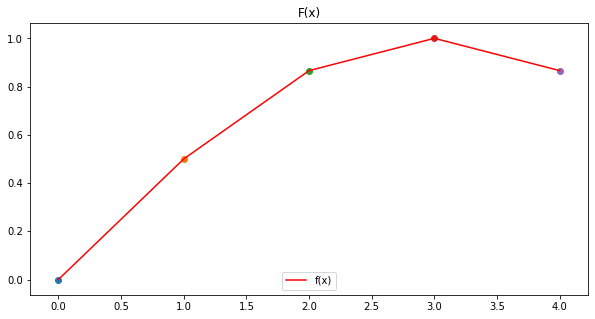

In [4]:
figure = plt.figure(figsize=(10, 5))
plt.plot(x,f_x,'r', label = 'f(x)')
plt.title('F(x)')
for i in range(len(x)):
    plt.scatter(x[i], f_x[i])
plt.legend(loc='lower center')

In [6]:
#метод прогонки
def tridig_matrix_algorithm(A, b):
    P = [-elem[2] for elem in A]
    Q = [elem for elem in b]
    
    P[0] /= A[0][1]
    Q[0] /= A[0][1]
    
    for i in range(1, len(b)):
        z = (A[i][1] + A[i][0] * P[i-1])
        P[i] /= z
        Q[i] -= A[i][0] * Q[i-1]
        Q[i] /= z
    
    x = [item for item in Q]
    
    for i in range(len(x) - 2, -1, -1):
        x[i] += P[i] * x[i + 1]
    
    return x

In [11]:
# поиск коэффициентов
def h_coef(x):
    h = [x[i] - x[i - 1] for i in range(1, len(x))]
    return h

h = h_coef(x)
h

[1.0, 1.0, 1.0, 1.0]

In [12]:
def c_coef(h, y):
    A = [[h[i - 1], 2.0*(h[i - 1] + h[i]), h[i]] for i in range(1, len(h))]
    A[0][0] = A[-1][2] = 0.0
    B = [3.0*((y[i + 1] - y[i])/h[i] - (y[i] - y[i - 1])/h[i - 1]) for i in range(1, len(h))]
    return [0.0] + tridig_matrix_algorithm(A, B)

c = c_coef(h, f_x)
c

[0.0, -0.07228125000000005, -0.11278499999999991, -0.17275875000000007]

In [13]:
def a_coef(y):
    a = list(y[:len(y)-1])
    return a

a = a_coef(f_x)
a

[0.0, 0.5, 0.86603, 1.0]

In [15]:
def b_coef(y, h, c):
    b = [(y[i] - y[i-1])/h[i-1] - (h[i-1]/3.0)*(2.0*c[i-1] + c[i]) for i in range(1, len(h))]
    b.append((y[-1] - y[-2])/h[-1] - (2.0*h[-1]*c[-1])/3.0)
    return b

b = b_coef(f_x, h, c)
b

[0.52409375, 0.45181249999999995, 0.26674624999999996, -0.01879749999999998]

In [17]:
def d_coef(h, c):
    d = [(c[i] - c[i-1])/(3.0*h[i-1]) for i in range(1, len(h))]
    d.append(-c[-1]/(3.0*h[-1]))
    return d

d = d_coef(h, c)
d

[-0.024093750000000014,
 -0.013501249999999956,
 -0.019991250000000054,
 0.057586250000000026]

In [22]:
def find_interval(x, p):
    for i in range(0, len(p) - 1):
        if p[i] <= x and x <= p[i + 1]:
            return i

def interpolation(X, y):
    h = h_coef(X)
    c = c_coef(h, y)
    a = a_coef(y)
    b = b_coef(y, h, c)
    d = d_coef(h, c)
    def interpol(x):
        pos = find_interval(x, X)
        if pos < 0:
            return b[0]*x + a[0] - b[0]*X[0]
        elif pos == len(X) - 1:
            return Y[-1] + (b[-1] + 2.0*c[-1]*h[-1] + 3.0*d[-1]*h[-1]*h[-1])*(x - X[-1])
        return a[pos] + b[pos]*(x - X[pos]) + c[pos]*((x - X[pos])**2) + d[pos] * ((x - X[pos])**3)
    return interpol



In [23]:
Sn = interpolation(x, f_x)
Sn(x_ans)

0.70614828125

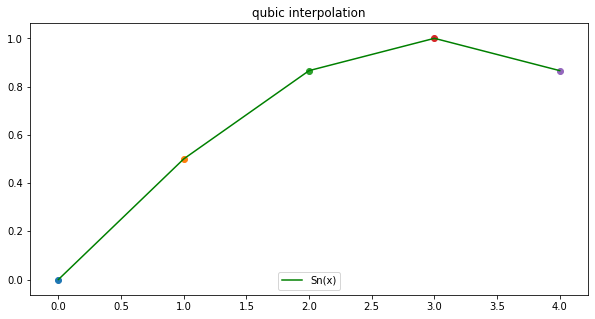

In [31]:
x_1 = [0.0, 1.0, 2.0, 3.0, 4.0]

y1 = list(map(Sn, x_1)) 

figure = plt.figure(figsize=(10, 5))

plt.plot(x_1, y1,'g', label = 'Sn(x)')
plt.title('qubic interpolation')
for i in range(len(x)):
    plt.scatter(x_1[i], y1[i])
plt.legend(loc='lower center')

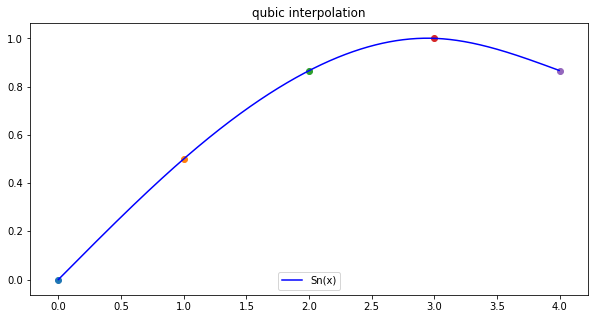

In [33]:
x_ = np.arange(0, 4.0, 0.005)
y = list(map(Sn, x_)) 

figure = plt.figure(figsize=(10, 5))

plt.plot(x_,y,'b', label = 'Sn(x)')
plt.title('qubic interpolation')
for i in range(len(x_1)):
    plt.scatter(x_1[i], y1[i])
plt.legend(loc='lower center')